In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [3]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),
               filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [4]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [5]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 37s 16ms/step - loss: 0.4707 - accuracy: 0.8532 - val_loss: 0.0490 - val_accuracy: 0.9840
Epoch 2/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0870 - accuracy: 0.9740 - val_loss: 0.0336 - val_accuracy: 0.9886
Epoch 3/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0675 - accuracy: 0.9800 - val_loss: 0.0348 - val_accuracy: 0.9889
Epoch 4/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 0.0295 - val_accuracy: 0.9900
Epoch 5/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0264 - val_accuracy: 0.9921
Epoch 6/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0282 - val_accuracy: 0.9916
Epoch 7/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.0256 - val_accuracy: 0.992

In [6]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0272 - accuracy: 0.9939


[0.02719534933567047, 0.9939000010490417]

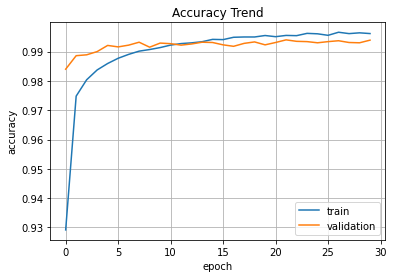

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

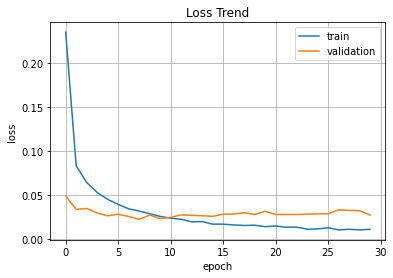

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()